In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from scipy import io

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from skimage.measure import block_reduce
from sklearn.model_selection import GridSearchCV
from umap import UMAP
from sklearn.externals import joblib
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score, make_scorer
from skimage.transform import rotate, rescale, warp

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import Input
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [3]:
data = io.loadmat('Data/mnist-original.mat')
x, y = data['data'].T, data['label'].T
x = x/255

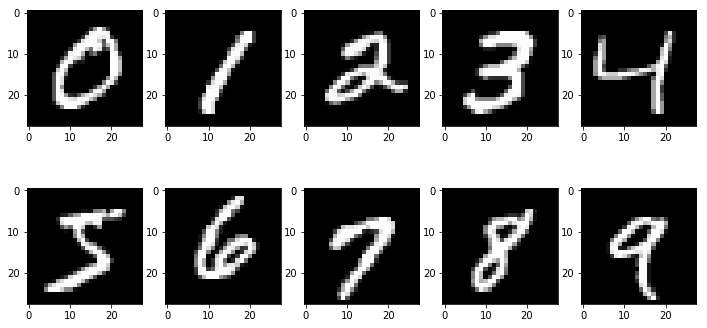

In [4]:
# ploting one of each class

fig = plt.figure(figsize=(12,6))
for number in range(0,10):
    num=(np.array([np.reshape(item, (28, 28)) for item in x[np.where(y == number)[0]]]))      
    
    numb = fig.add_subplot(2, 5, number+1) 
    numb.imshow(num[0] ,cmap='gray')

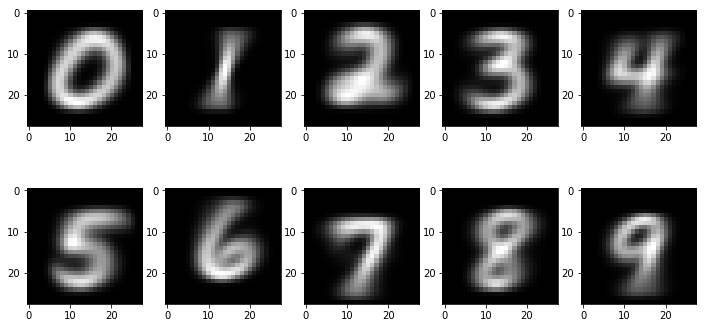

In [5]:
# ploting mean of each class

fig = plt.figure(figsize=(12,6))
for number in range(0,10):
    num=np.mean(np.array([np.reshape(item, (28, 28)) for item in x[np.where(y == number)[0]]]), axis=0)      
    
    numb = fig.add_subplot(2, 5, number+1) 
    numb.imshow(num ,cmap='gray')

In [6]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y.flatten(), test_size=0.3,stratify=y.flatten())
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.25,stratify=y_test )

# Classification stacking some "simple" models: Random Forest, XGBOOST and KNN


In [7]:
# Manifold Learning 
umap = UMAP(n_components=2)
umap.fit(x_train)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=False)

In [8]:
# UMAP
x_umap_train = umap.transform(x_train)
x_umap_val = umap.transform(x_val)
x_umap_test = umap.transform(x_test)

In [9]:
# # tunning hyper randomForest

# model_randforest = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
#      param_grid = { 
#             "n_estimators"      : [900,950,1000],
#             "max_features"      : ["auto"],
#             "min_samples_split" : [2,5,10],
#              "min_samples_leaf" : [4,3,5],
#             "max_depth" :[20,25,30], 
#             "bootstrap": [True],
#             },
#     scoring=make_scorer(accuracy_score),
#     n_jobs=-1,
#     cv=4,
#     verbose=6)

# model_randforest.fit(x_umap_train, y_train)

In [10]:
# # tunning hyper XGBOOST

# model_xgb = GridSearchCV(XGBClassifier(),
#      param_grid = { 
#                     'base_score':[0.1,0.5],
#                       'booster':['gbtree'],
#                       'learning_rate':[0.01,0.1],  
#                       'colsample_bytree':[1],
#                       'subsample':[0.7,1],
#                       'objective':["multi:softprob"], 
#                       'num_class':[10],
#                       'n_estimators':[100,600], 
#                       'reg_alpha':[0, 0.1],
#                      'reg_lambda':[1],
#                       'max_depth':[6,3],
#                       'min_child_weight':[4,1],
#                       'gamma':[0,0.1],         
#             },
#     scoring=make_scorer(accuracy_score),
#     n_jobs=-1,
#     cv=4,
#     verbose=6)

# model_xgb.fit(x_umap_train, y_train)

In [11]:
# model_knn = GridSearchCV(KNeighborsClassifier(),
#     param_grid={
#         'leaf_size':np.arange(1,40,2),
#         'metric':['minkowski'],
#         'p':np.arange(1,8,1),
#         'n_neighbors':np.arange(1,16,1),
#         'weights':['uniform'],
#         'algorithm': ['auto'],
#           },
#     scoring=make_scorer(accuracy_score),
#     n_jobs=-1,
#     cv=4,
#     verbose=6)
# model_knn.fit(x_umap_train, y_train)

In [12]:
# Classification  RandomForestClassifier

random_forest = RandomForestClassifier(n_jobs=-1,class_weight='balanced',max_depth=30, min_samples_leaf=5,min_samples_split=5,n_estimators=900)
random_forest.fit(x_umap_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=30, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=900, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [13]:
# Classification XGBOOST

xgb = XGBClassifier(n_jobs=-1,base_score=0.1,max_depth=6,n_estimators=105,num_class=10,subsample=0.7)
xgb.fit(x_umap_train, y_train)

XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=105,
       n_jobs=-1, nthread=None, num_class=10, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [14]:
# Classification KNN

knn = KNeighborsClassifier(n_neighbors=8, n_jobs=-1)
knn.fit(x_umap_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

In [15]:
# Ensemble models - hard voting
ensemble = VotingClassifier(estimators=[('KNN Model', knn),\
                                        ('Randforest Model', random_forest),\
                                        ('XGB Model ', xgb)],\
                                        voting="hard",\
                                        n_jobs=-1,
                                        weights = [1,1,1])
ensemble.fit(x_umap_train, y_train)

VotingClassifier(estimators=[('KNN Model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')), ('Randforest Model', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion=...te=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7))],
         flatten_transform=None, n_jobs=-1, voting='hard',
         weights=[1, 1, 1])

In [16]:
# Ensemble models - soft voting
ensemble2 = VotingClassifier(estimators=[('KNN Model', knn),\
                                        ('Randforest Model', random_forest),\
                                        ('XGB Model ', xgb)],\
                                        voting="soft",\
                                        n_jobs=-1,
                                        weights = [1,1,1])
ensemble2.fit(x_umap_train, y_train)

VotingClassifier(estimators=[('KNN Model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')), ('Randforest Model', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion=...te=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7))],
         flatten_transform=None, n_jobs=-1, voting='soft',
         weights=[1, 1, 1])

In [17]:
# model  scores

print('Ensemble models - soft voting')
print("The Train classification accuracy is: %3.3f" % (100 * ensemble2.score(x_umap_train, y_train)))
print("The validation classification accuracy is: %3.3f" % (100 * ensemble2.score(x_umap_val, y_val)))
print("The Test classification accuracy is: %3.3f" % (100 * ensemble2.score(x_umap_test, y_test)))

print('Ensemble models - hard voting')
print("The Train classification accuracy is: %3.3f" % (100 * ensemble.score(x_umap_train, y_train)))
print("The validation classification accuracy is: %3.3f" % (100 * ensemble.score(x_umap_val, y_val)))
print("The Test classification accuracy is: %3.3f" % (100 * ensemble.score(x_umap_test, y_test)))

Ensemble models - soft voting
The Train classification accuracy is: 96.635
The validation classification accuracy is: 95.683
The Test classification accuracy is: 95.886
Ensemble models - hard voting
The Train classification accuracy is: 96.641
The validation classification accuracy is: 95.689
The Test classification accuracy is: 95.886


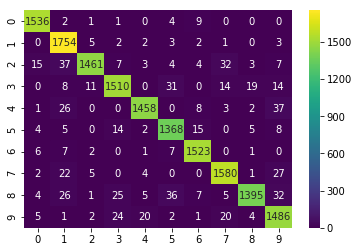

In [18]:
# Confusion matrix 

confusion = confusion_matrix(y_val, ensemble.predict(x_umap_val))
sns.heatmap(confusion, annot=True, fmt="g", cmap='viridis')
plt.show()

# Using Tensorflow/Keras

In [19]:
# Enconde classes

one_hot_encoder = OneHotEncoder()
y_train_one_hot = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_val_one_hot = one_hot_encoder.transform(y_val.reshape(-1, 1))

one_hot_encoder.categories_

[array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])]

In [20]:
# Keras

input_layer = Input(shape=(x_train.shape[1],))
dnn = Dense(128, activation='relu')(input_layer)
dnn = Dense(128, activation='relu')(dnn)
output_layer = Dense(10, activation='softmax')(dnn)

dnn_model = Model(input_layer, output_layer)
print(dnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# Compile DNN
dnn_model.compile('adam', loss='categorical_crossentropy', metrics=[categorical_accuracy])

hist = dnn_model.fit(
    x=x_train, y=y_train_one_hot,
    validation_data=(x_val, y_val_one_hot),
    epochs=1000,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=100),
        ModelCheckpoint('dnn.h5', save_best_only=True)
    ]
)

Train on 49000 samples, validate on 15750 samples
Epoch 1/1000
49000/49000 [==============================] - 7s 143us/step - loss: 0.2485 - categorical_accuracy: 0.9281 - val_loss: 0.1333 - val_categorical_accuracy: 0.9599
Epoch 2/1000
49000/49000 [==============================] - 5s 104us/step - loss: 0.1028 - categorical_accuracy: 0.9682 - val_loss: 0.1073 - val_categorical_accuracy: 0.9683
Epoch 3/1000
49000/49000 [==============================] - 5s 104us/step - loss: 0.0705 - categorical_accuracy: 0.9775 - val_loss: 0.0874 - val_categorical_accuracy: 0.9733
Epoch 4/1000
49000/49000 [==============================] - 5s 104us/step - loss: 0.0531 - categorical_accuracy: 0.9832 - val_loss: 0.0813 - val_categorical_accuracy: 0.9751
Epoch 5/1000
49000/49000 [==============================] - 5s 104us/step - loss: 0.0427 - categorical_accuracy: 0.9854 - val_loss: 0.1008 - val_categorical_accuracy: 0.9721
Epoch 6/1000
49000/49000 [==============================] - 5s 104us/step - loss

In [22]:
# Inception
inputs = Input(shape=(28, 28, 1))

# Inception Unit
hd_cnn = Conv2D(16, (10, 10), activation='relu', name='HD')(inputs)
hd_cnn = Flatten()(hd_cnn)

md_cnn = Conv2D(16, (5, 5), activation='relu', name='MD1')(inputs)
md_cnn = MaxPool2D((2, 2))(md_cnn)
md_cnn = Conv2D(32, (5, 5), activation='relu', name='MD2')(md_cnn)
md_cnn = Flatten()(md_cnn)

ld_cnn = Conv2D(32, (3, 3), activation='relu', name='LD1')(inputs)
ld_cnn = MaxPool2D((2, 2))(ld_cnn)
ld_cnn = Conv2D(64, (3, 3), activation='relu', name='LD2')(ld_cnn)
ld_cnn = MaxPool2D((2, 2))(ld_cnn)
ld_cnn = Conv2D(128, (3, 3), activation='relu', name='LD3')(ld_cnn)
ld_cnn = Flatten()(ld_cnn)

inception = concatenate([hd_cnn, md_cnn, ld_cnn])

# DNN
dnn = Dense(24, activation='elu')(inception)
outputs = Dense(10, activation='softmax')(dnn)

inception_model = Model(inputs, outputs)

print(inception_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
LD1 (Conv2D)                    (None, 26, 26, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)   0           LD1[0][0]                        
__________________________________________________________________________________________________
MD1 (Conv2D)                    (None, 24, 24, 16)   416         input_2[0][0]                    
__________________________________________________________________________________________________
LD2 (Conv2

In [26]:
# Compile Inception

inception_model.compile('rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
inception_model.fit(
    x=x_train.reshape((len(x_train), 28, 28, 1)), y=y_train_one_hot,
    validation_data=(x_val.reshape((len(x_val), 28, 28, 1)), y_val_one_hot),
    epochs=1000, batch_size=10000,
    callbacks=[ EarlyStopping(monitor='val_loss', patience=10,min_delta=0.001),
               ModelCheckpoint('inception.h5', save_best_only=True)]
)

Train on 49000 samples, validate on 15750 samples
Epoch 1/1000
49000/49000 [==============================] - 3s 62us/step - loss: 0.0688 - acc: 0.9851 - val_loss: 0.0413 - val_acc: 0.9905
Epoch 2/1000
49000/49000 [==============================] - 2s 50us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0388 - val_acc: 0.9910
Epoch 3/1000
49000/49000 [==============================] - 2s 50us/step - loss: 9.5472e-04 - acc: 0.9999 - val_loss: 0.0384 - val_acc: 0.9909
Epoch 4/1000
49000/49000 [==============================] - 2s 50us/step - loss: 7.7513e-04 - acc: 1.0000 - val_loss: 0.0382 - val_acc: 0.9910
Epoch 5/1000
49000/49000 [==============================] - 2s 49us/step - loss: 6.7700e-04 - acc: 1.0000 - val_loss: 0.0384 - val_acc: 0.9910
Epoch 6/1000
49000/49000 [==============================] - 2s 49us/step - loss: 5.8772e-04 - acc: 1.0000 - val_loss: 0.0383 - val_acc: 0.9910
Epoch 7/1000
49000/49000 [==============================] - 2s 49us/step - loss: 5.2990e-04 - acc: 1